# Table of content

1. Introduction - Loading libraries and dataset
2. Exploration, engineering and cleaning features (or variables)
3. Correlaration analysis - Tri-variate analysis
4. Prediction models with cross-validation
5. Stacking predictions

**Note:** Ever feel burnt out? Missing a deeper meaning? Sometimes life gets off-balance, but with the right steps, we can find the personal path to authentic happiness and balance.
[Check out how Machine Learning and statistical analysis](https://www.amazon.com/dp/B07BNRRP7J?ref_=cm_sw_r_kb_dp_TZzTAbQND85EE&tag=kpembed-20&linkCode=kpe) sift through 10,000 responses to help us define our unique path to better living.

# 1. Introduction - Loading libraries and dataset
I created this Python notebook as the learning notes of my first Machine Learning project.
So many new terms, new functions, new approaches, but the subject really interested me; so I dived into it, studied one line of code at a time, and captured the references and explanations in this notebook.

The algorithm itself is a fork from **Anisotropic's Introduction to Ensembling/Stacking in Python**, a great notebook in itself.
His notebook was itself based on **Faron's "Stacking Starter"**, as well as **Sina's Best Working Classfier**. 
I also used multiple functions from **Yassine Ghouzam**.
I added many variations and additional features to improve the code (as much as I could) as well as additional visualization.

But most importantly, you can use this kernel as a first project to practice your ML/Python skills.
I welcome comments , questions and additional feedback.

Yvon

## 1.1. Importing Library

In [1]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
from collections import Counter

# Machine learning libraries
#import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics
import sklearn         # Collection of machine learning algorithms 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

## 1.2. Loading dataset

In [2]:
# Load in the train and test datasets from the CSV files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

# Display the first 5 rows of the dataset, a first look at our data
# 5 first row, 5 sample rows and basic statistics
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**What are the data types for each feature?**
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

## 1.3. Analysis goal
**The Survived variable** is the outcome or dependent variable. It is a binary nominal datatype of 1 for "survived" and 0 for "did not survive".
**All other variables** are potential predictor or independent variables. The goal is to predict this dependent variable only using the available independent variables. A test dataset has been created to test our algorithm.

## 1.4. A very first look into the data

Text(0.5,1,'Survival Rate by Embarked')

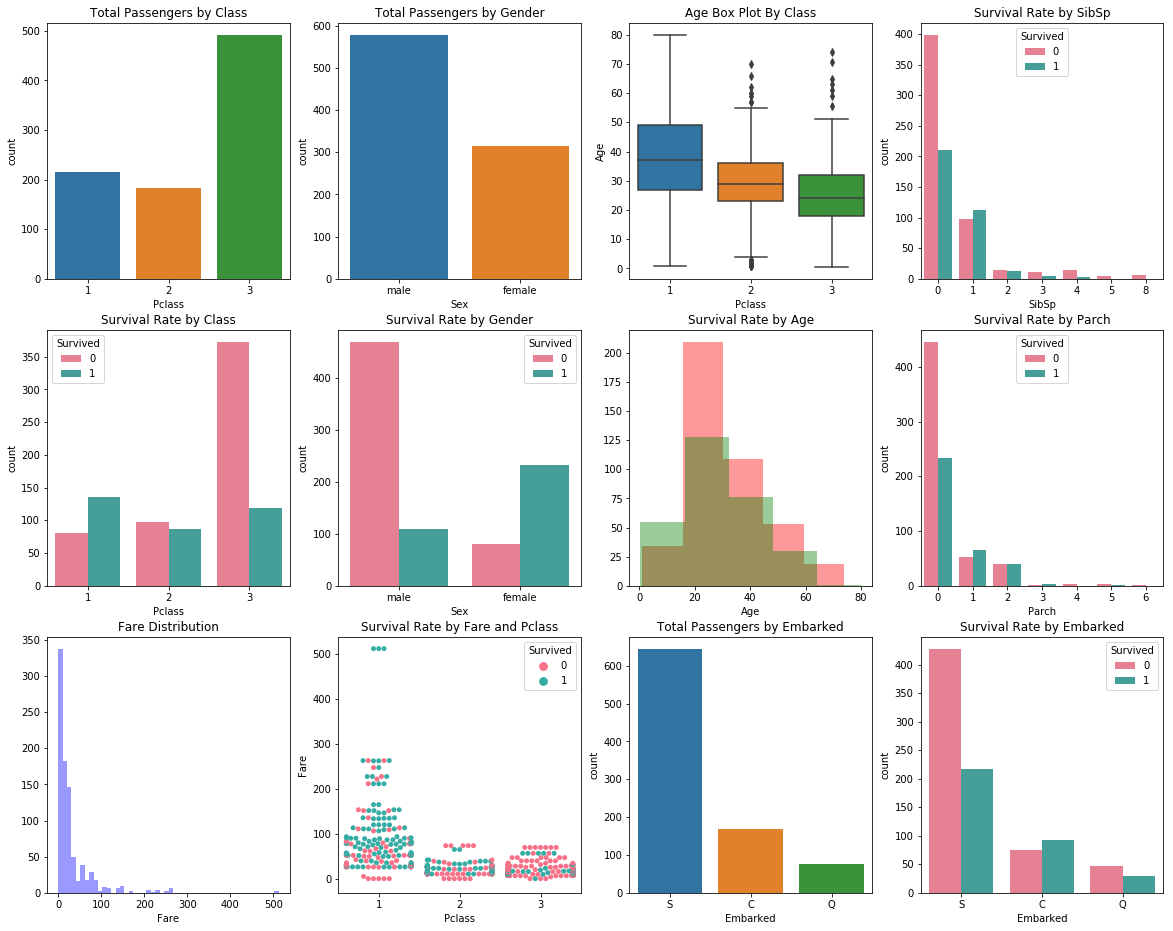

In [5]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0,3],palette='husl')
sns.distplot(train['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=train,ax=ax[2,2])

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1,1],palette='husl')
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl',ax=ax[2,1])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

# 2. Exploratory analysis: cleaning and engineering features

We will start with a standard approach of any kernel: correct, complete, engineer the right features for analysis.

## 2.1. Correcting and completing features
### Detecting and correcting outliers
Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

There are potential outliers that we will identify and remove with the following method (steps from Yassine Ghouzam):
* It creates firset a function called detect_outliers, implementing the Tukey method
* For each column of the dataframe, this function calculates the 25th percentile (Q1) and 75th percentile (Q3) values.
* The  interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between the 75th and 25th percentiles, or between upper and lower quartiles.
* Any data points outside 1.5 time the IQR (1.5 time IQR below Q1, or 1.5 time IQR above Q3), is considered an outlier.
* The outlier_list_col column captures the indices of these outliers. All outlier data get then pulled into the outlier_indices dataframe.
* Finally, the detect_outliers function will select only the outliers happening multiple times. This is the datadframe that will be returned.


## why not use clip

In [24]:
# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [26]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

** Observations**
* The Detect_Outliers function found 10 outliers.
* PassengerID 28, 89 and 342 passenger have an high Ticket Fare
* The seven others have very high values of SibSP.
* We will drop those.

In [27]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [30]:
train.shape,test.shape

((881, 12), (418, 11))

### Completing features
The .info function below shows how complete or incomplete the datasets are.
There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values.

The approach to to complete missing data is to impute using mean, median, or mean + randomized standard deviation. 
We will do this in section 2.2 with the  **fillna** function:  dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [29]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## 2.2. Descriptive analysis (univariate) 

In [31]:
full_data = [train, test]
Survival = train['Survived']
Survival.describe()

count    881.000000
mean       0.385925
std        0.487090
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## 2.3 Feature Engineering - Bi-variate statistical analysis

One of the first tasks in Data Analytics is to **convert the variables into numerical/ordinal values**.
There are multiple types of data

**a) Qualitative data: discrete**
* Nominal: no natural order between categories. In this case: Name
* Categorical: Sex

**b) Numeric or quantitative data**
* Discrete: could be ordinal like Pclass or not like Survived.
* Continuous. e.g.: age
Many feature engineering steps were taken from Anisotropic's excellent kernel.

### Pclass

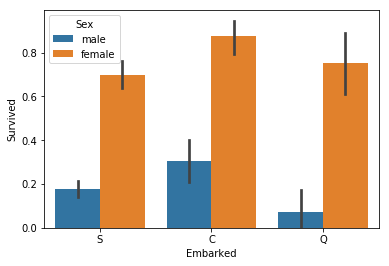

In [34]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train);

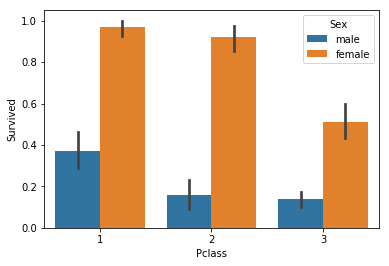

In [36]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train);

### Name_length

* 不同名字长度的人数，和存活率

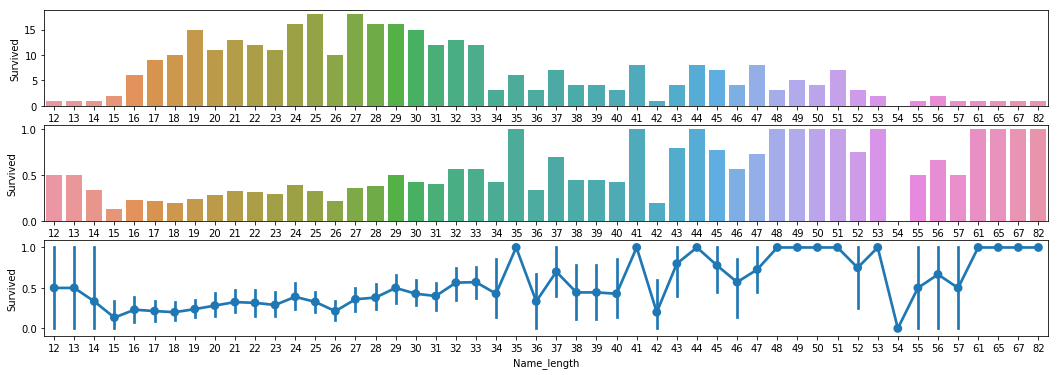

In [39]:
for dataset in full_data:
    dataset['Name_length'] = train['Name'].apply(len)
    # Qcut is a quantile based discretization function to autimatically create categories
    # dataset['Name_length'] = pd.qcut(dataset['Name_length'], 6, labels=False)
    # train['Name_length'].value_counts()

sum_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()
average_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(18,6))
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = axis1)
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = axis2)
sns.pointplot(x = 'Name_length', y = 'Survived', data=train, ax = axis3)

The first graph shows the amount of people by Name_length.

The second one, their average survival rates.

The proposed categories are: less than 23 (mostly men), 24 to 28, 29 to 40, 41 and more (mostly women)

In [43]:
for dataset in full_data:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length'] 						            = 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']  = 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']  = 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length'] 							        = 3
train['Name_length'].value_counts()

0    358
1    235
2    198
3     90
Name: Name_length, dtype: int64

### Gender (Sex)

In [47]:
for dataset in full_data:# Mapping Gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

### Age

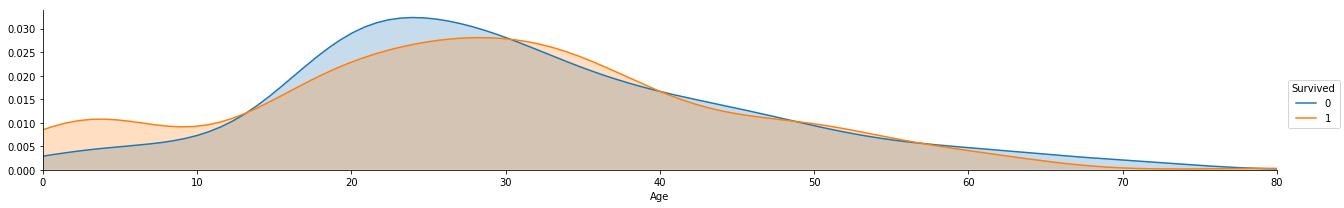

In [51]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

The best categories for age are:
* 0:  Less than 14
* 1:  14 to 30
* 2:  30 to 40
* 3:  40 to 50
* 4:  50 to 60
* 5:  60 and more

In [57]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
# Qcut is a quantile based discretization function to autimatically create categories (not used here)
# dataset['Age'] = pd.qcut(dataset['Age'], 6, labels=False)
# Using categories as defined above
    dataset.loc[ dataset['Age'] <= 14, 'Age'] 						          = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age']        = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age']        = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age']        = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age']        = 4
    dataset.loc[ dataset['Age'] > 60, 'Age'] 							      = 5
train['Age'].value_counts()

1    431
2    210
3     98
0     78
4     42
5     22
Name: Age, dtype: int64

### Family: SibSp and Parch

* 把票价用中位数填充
* Familysize ，用两者之和
* 是不是孤儿，如果没有亲人=1
* 是不是男童

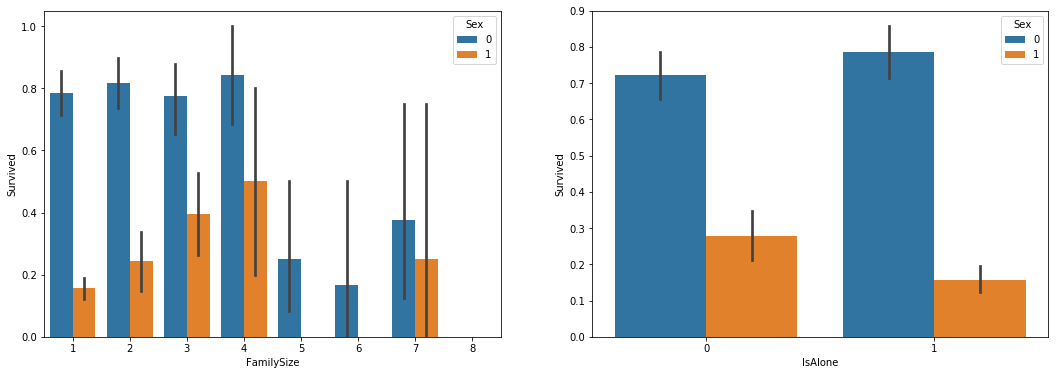

In [58]:
for dataset in full_data:
# Remove all NULLS in the Fare column and create a new feature Categorical Fare
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
# Create new feature FamilySize as a combination of SibSp and Parch
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Create new feature IsAlone from FamilySize
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
    
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train, ax = axis1);
sns.barplot(x="IsAlone", y="Survived", hue="Sex", data=train, ax = axis2);

### Fare

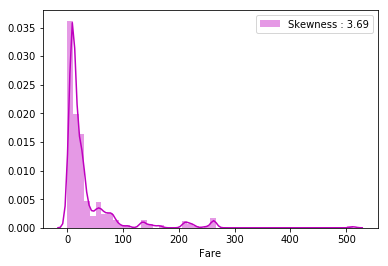

In [62]:
# Explore Fare distribution 
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

**Observations**
* The Fare distribution is very skewed to the left. This can lead to overweigthing the model with very high values.
* In this case, it is better to transform it with the log function to reduce the skewness and redistribute the data.

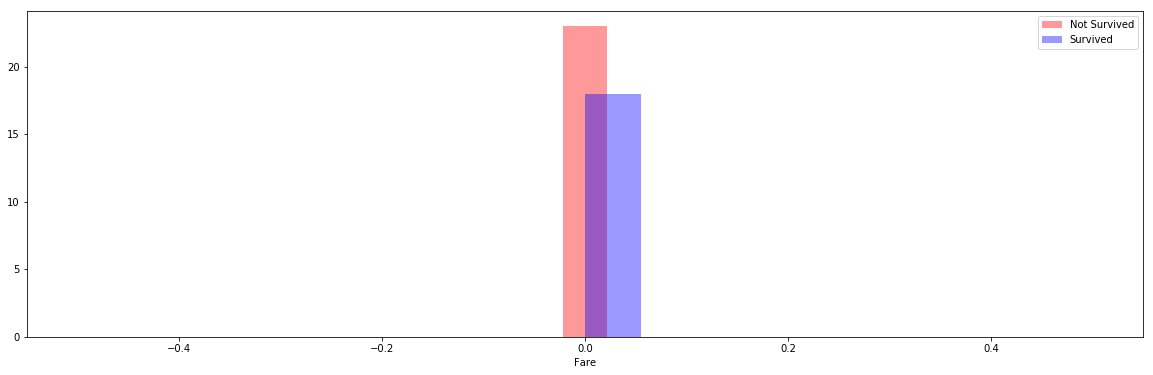

In [72]:
# Apply log to Fare to reduce skewness distribution
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.distplot(train["Fare"][train["Survived"] == 0], color="r", label="Skewness : %.2f"%(train["Fare"].skew()), ax=ax)
g = sns.distplot(train["Fare"][train["Survived"] == 1], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(["Not Survived","Survived"])

**Observations**
Log Fare categories are:
* 0 to 2.7: less survivors
* More than 2.7 more survivors

In [73]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] 						      = 0
#    dataset.loc[(dataset['Fare'] > 2.7) & (dataset['Fare'] <= 3.2), 'Fare']   = 1
#    dataset.loc[(dataset['Fare'] > 3.2) & (dataset['Fare'] <= 3.6), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare'] 							  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train['Fare'].value_counts()

0    881
Name: Fare, dtype: int64

### Cabin

* 客舱

In [74]:
# Feature that tells whether a passenger had a cabin on the Titanic (O if no cabin number, 1 otherwise)
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,134


In [75]:
train[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.302941


### Embarked

* 登录口岸
* 

In [76]:
for dataset in full_data:
# Remove all NULLS in the Embarked column
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.587302,0.463415,0.193642,0.341195
1,0.694118,0.529412,0.378788,0.553571
2,0.5,0.666667,0.375,0.38961
All,0.629108,0.472826,0.245868,0.385925


Irrespective of the class, passengers embarked in 0 (S) and 2 (Q) have lower chance of survival. I will combine those into the first category.

In [79]:
dataset['Embarked'] = dataset['Embarked'].replace(['0', '2'], '0')
train['Fare'].value_counts()

0    881
Name: Fare, dtype: int64

### Titles

* 找到职位

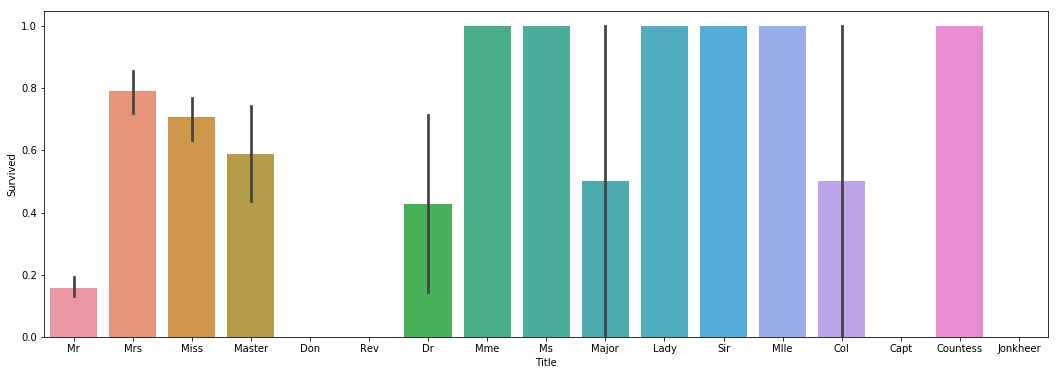

In [80]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train, ax=axis1);

There are 4 types of titles:
0. Mme, Ms, Lady, Sir, Mlle, Countess: 100%. 
1. Mrs, Miss: around 70% survival
2. Master: around 60%
3. Don, Rev, Capt, Jonkheer: no data
4. Dr, Major, Col: around 40%
5. Mr: below 20%

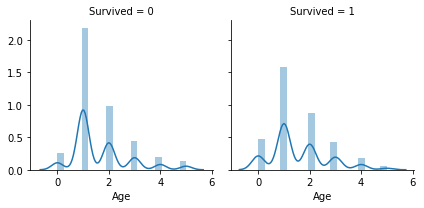

In [84]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
# Mapping titles
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

### Extracting deck from cabin
A cabin number looks like ‘C123’ and the letter refers to the deck: a big thanks to Nikas Donge.
Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [85]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
train['Deck'].value_counts()

8    680
3     56
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

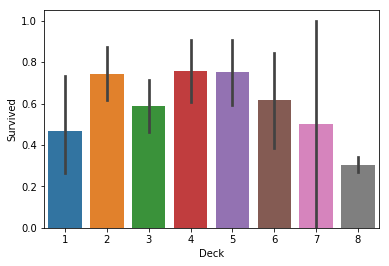

In [92]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train)

3 types of deck: 1 with 15 passengers, 2 to 6, and 7 to 8 (most passengers)

In [93]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 2
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 3
train['Deck'].value_counts()

3    684
2    181
1     16
Name: Deck, dtype: int64

### 2.3.2. Removing unnecessary features

In [ ]:
# for dataset in full_data:
#    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
# train['Age_Class'].value_counts()

In [ ]:
# for dataset in full_data:
#    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['FamilySize'])
#    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# train['Fare_Per_Person'].value_counts()

We now have clean features by replacing relevant categorical information with ordinal features.

## 2.4 Visualising updated dataset

In [94]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,U0,2,0,1,1,0,0,5.0,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,U0,0,3,2,0,0,0,1.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,5,0,0,240276,0,U0,2,0,1,1,0,0,5.0,3
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,0,U0,0,3,1,1,0,0,5.0,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,0,U0,0,1,3,0,0,0,1.0,3


In [95]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,U0,0,0,2,0,0,0,5,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,0,C85,1,3,2,0,0,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,0,U0,0,0,1,1,0,0,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,0,C123,0,3,2,0,0,1,1,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,0,U0,0,1,1,1,0,0,5,3


## 2.5. Descriptive statistics

In [96]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.0,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,0.649262,1.615210,0.455165,0.363224,0.0,0.365494,1.022701,1.818388,0.609535,0.044268,0.228150,3.423383,2.758229
std,256.617021,0.487090,0.835055,0.477472,1.106056,0.871571,0.791839,0.0,0.638100,1.019997,1.382086,0.488132,0.205806,0.419878,1.911413,0.468924
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,226.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,448.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,3.000000
75%,668.000000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,5.000000,6.000000,0.0,2.000000,3.000000,8.000000,1.000000,1.000000,1.000000,5.000000,3.000000


In [97]:
train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.528651,0.855823,1.648799,0.304991,0.0,0.312384,0.123845,1.757856,4.290203
1,1,1.955882,0.320588,1.561765,0.455882,0.0,0.450000,0.394118,1.914706,2.044118


**Initial observations from the descriptive statistics:**
* Only 38% survived, a real tragedy :-(
* Passengers in more expensive classes 1 and 2 had much higher chance of surviving than classes 3 or 4.
* Also, the higher the fare, the higher the chance. Similarly, having a cabin increases the chance of survival.
* Women (0) higher chance than men (1)
* Younger people slightly more chance than older
* Being alone decreased your chance to survive.

We will drop unncessary features just before Section 3.1. Pearson Correlation heatmap.

# 3. Correlation analysis - Tri-variate analysis
This section summarizes  bivariate analysis asthe simplest forms of quantitative (statistical) analysis.
It involves the analysis of one or two features, and their relative impact of "Survived". 
This is a useful frist step of our anblaysis in order to determine the empirical relationship between all features.

## 3.2. Correlation analysis with histograms and pivot-tables

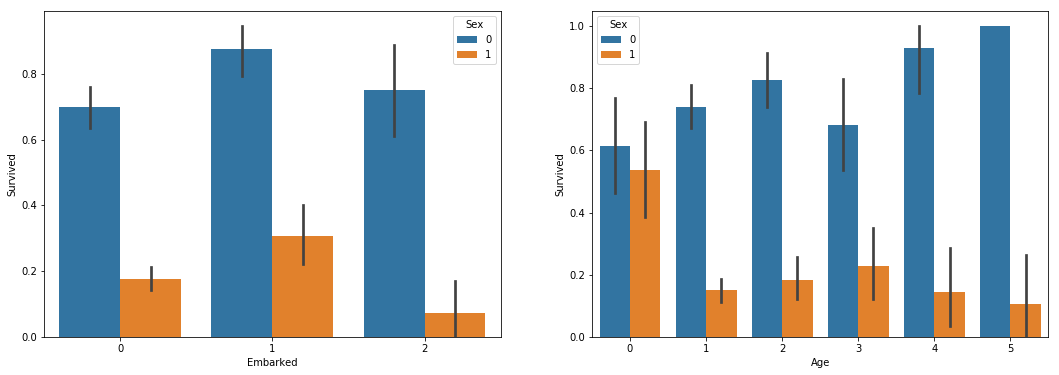

In [98]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))

sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train, ax = axis1);
#axis1.set_title('Pclass vs Fare Survival Comparison')

sns.barplot(x="Age", y="Survived", hue="Sex", data=train, ax = axis2);
#axis2.set_title('Pclass vs Fare Survival Comparison')


**Observations for Age graph:**
* 0 or blue represent women; 1 or orange represent men. Gender and age seem to have a stronger influece of the survival rate.
* We start to find where most survivors are: older women (48 to 64 year old), and younger passengers.
* What is statistically interesting is that only young boys (Age Category = 0) have  high survival rates, unlike other age groups for men.
* We will create a new feature called young boys

In [ ]:
# for dataset in full_data:
#    dataset['Boys'] = 0
#    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex']==1), 'Boys'] = 1
# dataset['Boys'].value_counts()

In [99]:
train[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [100]:
train_pivot = pd.pivot_table(train, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

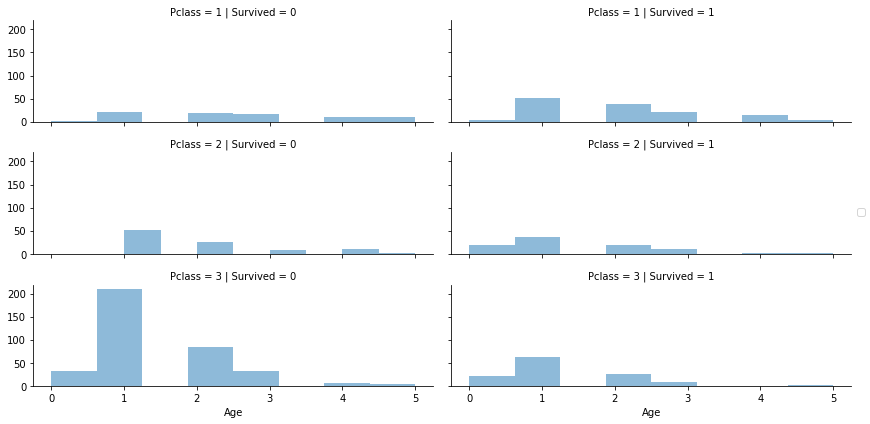

In [101]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

**Observations: here are the survivors!**
1. Family-size of 3 or 4 from first pivot
2. Women and men alone on first class (second pivot, red showing survival rate below 0.4)
3. Top-right in the graph above: first class and age categories 1 and 2

** The not-so lucky are mostly in men, Pclass 3 and age category 1 (younger folks)**

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

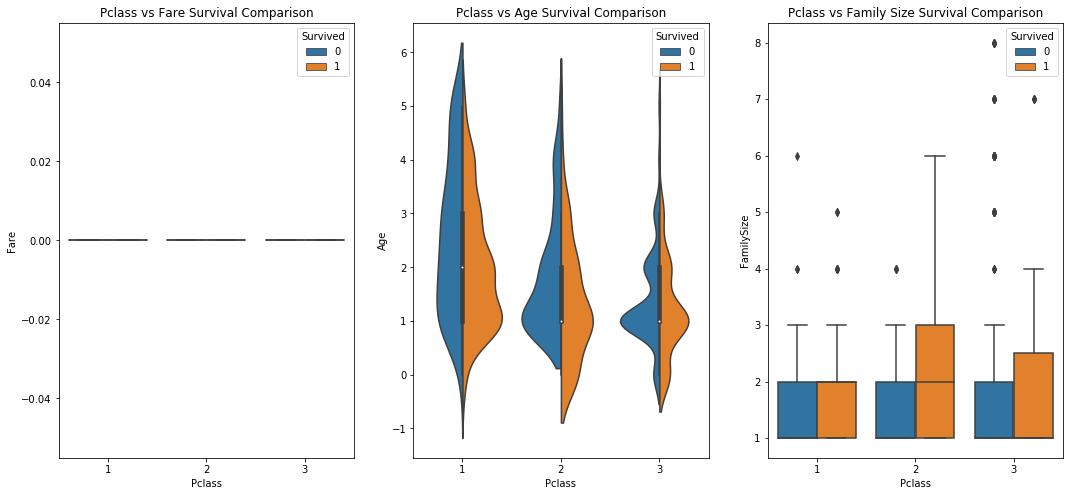

In [102]:
#graph distribution of qualitative data: Pclass
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

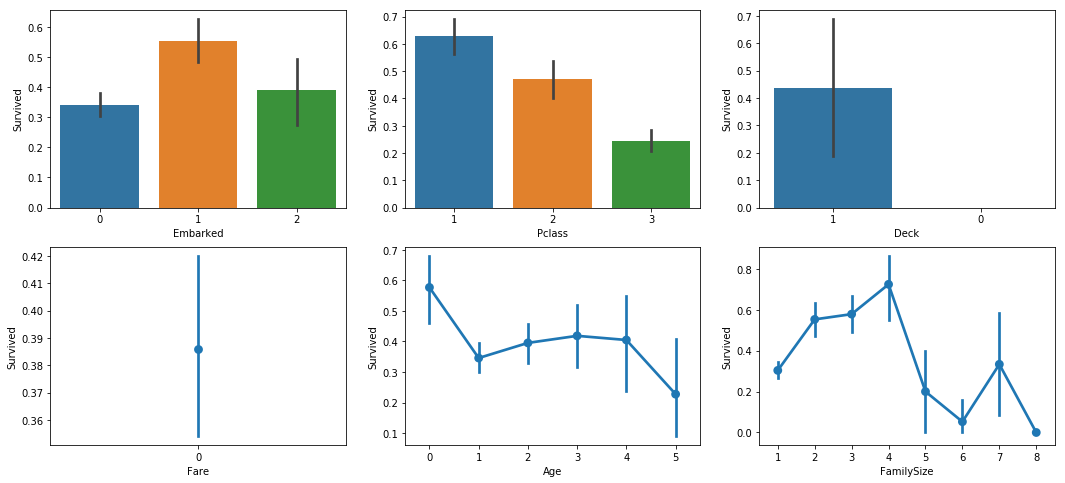

In [103]:
fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', order=[1,0], data=train, ax = saxis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived',  data=train, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train, ax = saxis[1,2])

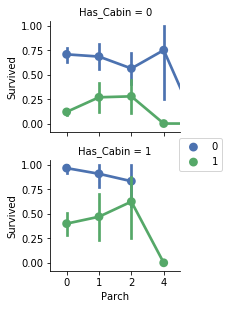

In [104]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations:**
* The colors represent: blue=0 is for women, green=1 for men
* Clearly, women had more chance of surviving, with or without cabin
* Interesting is that accompanied women without a cabin had less survival chance than women alone without cabin.
    But this is not true for men. Men alone have less chance than accompanied.
    
    **Bottom-line: it would have been better for women without cabin to pretend that they were alone.
    And lone men should join a family to improve their survival rates.**
    
    Bottom-line of the bi-variate and tri-variate analysis as well as the feature importance analysis (from running the classifiers multiple times), I decided to drop the following features:

In [105]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Boys', 'IsAlone', 'Embarked', 'Has_Cabin']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

## 3.1. Pearson Correlation Heatmap

The Seaborn plotting package allows us to plot heatmaps showing the Pearson product-moment correlation coefficient (PPMCC) correlation between features.
Pearson is bivariate correlation, measuring the linear correlation between two features. 

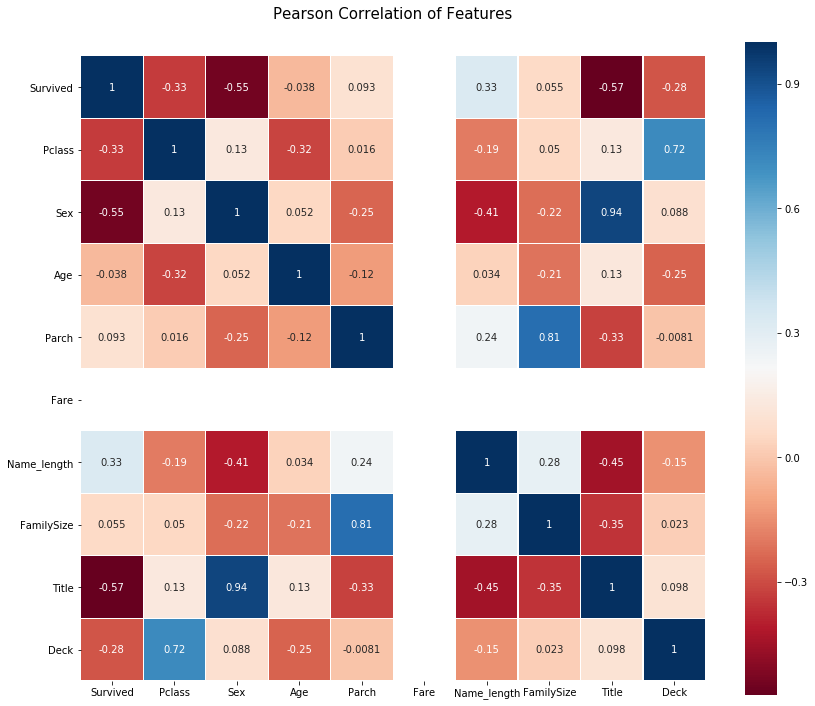

In [106]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Observations from the Pearson analysis:** 
* Correlation coefficients with magnitude between 0.5 and 0.7 indicate variables which can be considered **moderately correlated**.
* We can see from the red cells that many features are "moderately" correlated: specifically, IsAlone, Pclass, Name_length, Fare, Sex.
* This is influenced by the following two factors: 1) Women versus men (and the compounding effect of Name_length) and 2) Passengers paying a high price (Fare) have a higher chance of survival: there are also in first class, have a title. 


## 3.3. Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other.
The Seaborn pairplot class will help us visualize the distribution of a feature in relationship to each others.

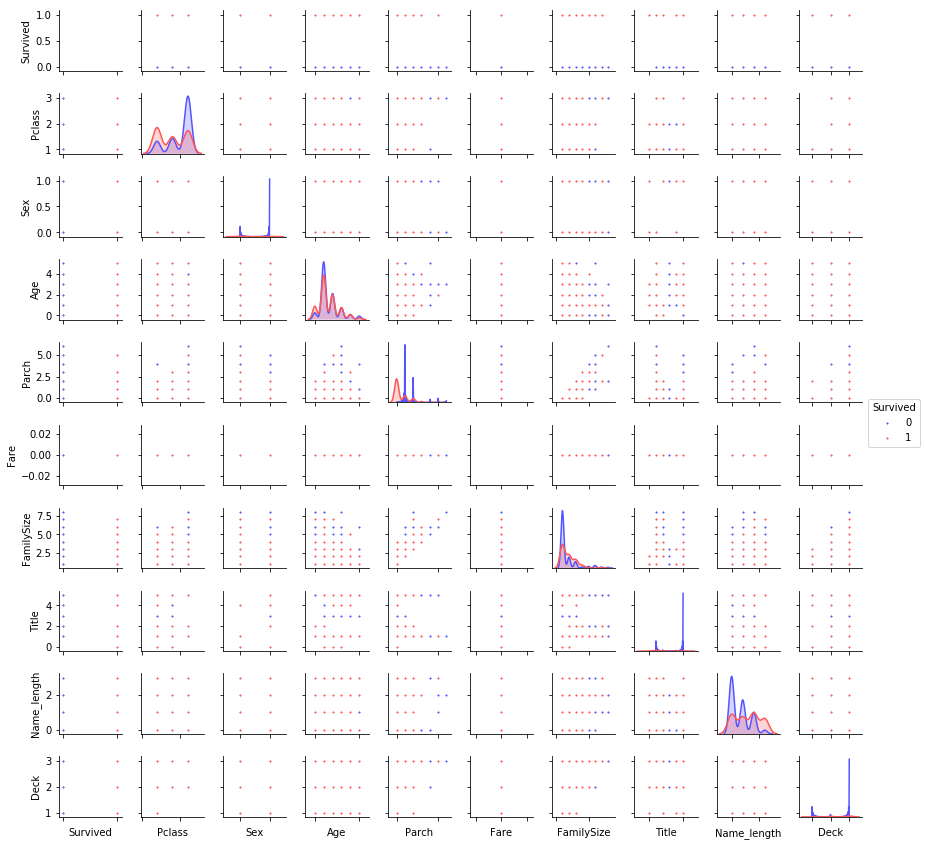

In [107]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare',
       u'FamilySize', u'Title', u'Name_length', u'Deck']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [108]:
# X_train (all features for training purpose but excluding Survived)
# Y_train (survival result of X-Train)
# and test are our 3 main datasets for the next sections
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape

((881, 9), (881,), (418, 9))

# 4. Predictive models
We will first apply the following nine algorithms to the entire three datasets listed above.
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

## 4.1. Logistic Regression
Logistic regression measures the relationship between the categorical dependent feature (in our case Survived) and the other independent features.
It estimates probabilities using a cumulative logistic distribution:
* The first value shows the accuracy of this model
* The table after this shows the importance of each feature according this classifier.

In [109]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.29

In [110]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,FamilySize,0.304421
1,Age,0.135872
3,Fare,0.122622
4,Name_length,0.000000
2,Parch,-0.187109
6,Title,-0.347577
7,Deck,-0.722297
0,Sex,-0.826509


**Observation:**
* This classfier confirms the importance of Name_length
* FamilySize did not show a strong Pearson correlation with Survived but comes here to the top. This can be due to its strong relationship with other features such as Is_Alone or Parch (Parent-Children).


## 4.2. Support Vector Machines (supervised)
Given a set of training samples, each sample is marked as belonging to one or the other of two categories.

The SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [116]:
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.31

## 4.3. k-Nearest Neighbors algorithm (k-NN)
This is a non-parametric method used for classification and regression.
A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [117]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.24

## 4.4. Naive Bayes classifier
This is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of features in a learning problem.

In [123]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.25

## 4.5. Perceptron
This is an algorithm for supervised learning of binary classifiers: like the other classifiers before, it decides whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [124]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.43

## 4.6. Linear SVC
This is another implementation of Support Vector Classification (similar to 4.2.) for the case of a linear kernel.

In [125]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.95

## 4.7. Stochastic Gradient Descent (sgd)
This is a stochastic approximation of the gradient descent optimization and iterative method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In [126]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

39.27

In [134]:
X_train.columns.shape

(9,)

In [137]:
sgd.coef_.shape

(1, 9)

## 4.8. Decision tree
This predictive model  maps features (tree branches) to conclusions about the target value (tree leaves).

The target features  take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [127]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.42

## 4.9. Random Forests
This is one of the most popular classfier.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [138]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.42

## 4.10. Model summary
I found that the picture illustrates the various model better than words.
This should be taken with a grain of salt, as the intuition conveyed by these two-dimensional examples does not necessarily carry over to real datasets.
The reality os that the algorithms work with many dimensions (11 in our case).

But it shows how each classifier algorithm partitions the same data in different ways.
The three rows represent the three different data set on the right.
The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

For instance, the visualization helps understand how RandomForest uses multiple Decision Trees, the linear SVC, or Nearest Neighbors grouping sample by their relative distance to each others.

![image](http://scikit-learn.org/0.15/_images/plot_classifier_comparison_0011.png)


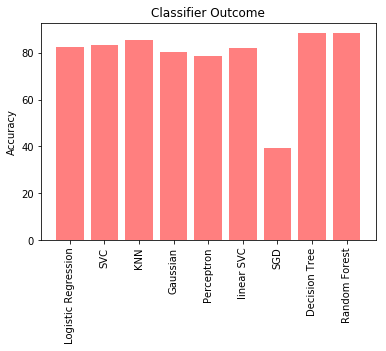

In [139]:
objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC', 'SGD', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies1 = [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

**Observations**
* The above models (classifiers) were applied to the entire training dataset.
* This results in some classifiers (Decision_tree and Random_Forest) over-fitting the model to the training data. 
* This happens when the classifiers use many input features (to include noise in each feature) on the complete dataset, and ends up “memorizing the noise” instead of finding the signal.
* This overfit model will then make predictions based on that noise. It performs unusually well on its training data (97 above), but will not necessarilyimprove the prediction quality with new data from the test dataset.
* We therefore need to cross-validate the models using sample data. We will therefore use StratifiedKFold to train and test the models on sample data from the overall dataset.
Stratified K-Folds is a cross validation iterator. It provides train/test indices to split data in train test sets. This cross-validation object is a variation of KFold, which returns stratified folds. The folds are made by preserving the percentage of samples for each class.

## 4.11. Model cross-validation with K-Fold

The fitting process applied above optimizes the model parameters to make the model fit the training data as well as possible.
Cross-validation is a way to predict the fit of a model to a hypothetical validation set when an explicit validation set is not available.
In simple words, it alows to test how well the model performs on new data.
In our case, cross-validation wikll also be applied to compare the performances of different predictive modeling procedures. 
![Cross-validation process:](https://image.slidesharecdn.com/kagglesharingmarkpeng20151216finalpresented-151216161621/95/general-tips-for-participating-kaggle-competitions-13-638.jpg?cb=1452565877)
### 4.11.1. Cross-validation scores

In [143]:
cross_val_score?

In [2]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [144]:
# Cross validate model with Kfold stratified cross validation
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 12
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron(random_state=random_state))
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))


In [148]:
cv_results[0].shape

(10,)

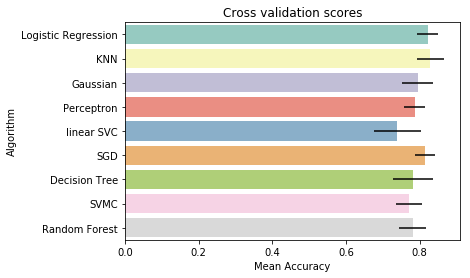

In [151]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression',  'KNN', 'Gaussian',
    'Perceptron', 'linear SVC', 'SGD', 'Decision Tree','SVMC', 'Random Forest']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 4.12 Hyperparameter tuning & Learning curves for selected classifiers
1. Adaboost
2. ExtraTrees 
3. RandomForest
4. GradientBoost
5. SVC

In [153]:
# Adaboost
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=70)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
adaDTC_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 435 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.4s finished


0.7797956867196367

In [154]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 9],
              "min_samples_split": [2, 3, 9],
              "min_samples_leaf": [1, 3, 9],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   28.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   35.2s finished


0.8297389330306469

In [155]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  43 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 629 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 713 out of 720 | elapsed:   16.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   16.2s finished


0.8161180476730987

In [156]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_
# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 273 out of 280 | elapsed:   13.8s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   14.1s finished


0.8286038592508513

In [157]:
# Random Forest
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 9],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}

gsrandom_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.4min finished


0.8308740068104427

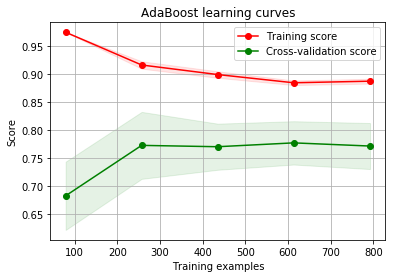

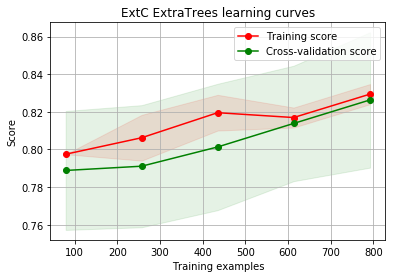

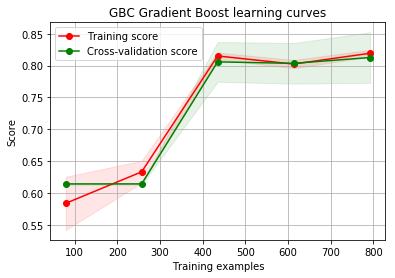

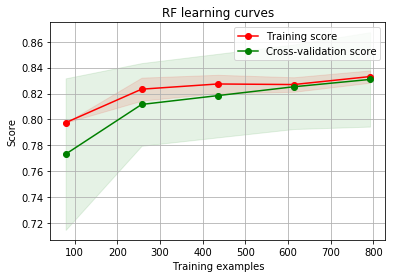

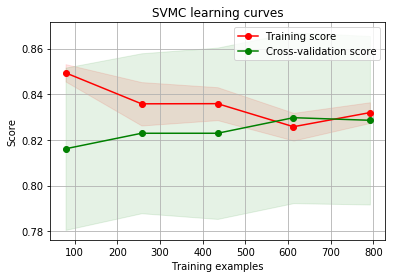

In [158]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtC ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GBC Gradient Boost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsrandom_forest.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVMC learning curves",X_train,Y_train,cv=kfold)

**Observations to fine-tune our models**
First, let's compare their best score after fine-tuning their parameters:
1. Adaboost: 80
2. ExtraTrees: 83
3. RandomForest: 82
4. GradientBoost: 82
5. SVC: 83

It appears that ExtraTree and SVC are doing the best job. This is good because we want to keep the model as close to the training data as possible. But not too close!
The two major sources of error are bias and variance; as we reduce these two, then we could build more accurate models:

* **Bias**: The less biased a method, the greater its ability to fit data well.
* **Variance**: with a lower bias comes typically a higher the variance. And therefore the risk that the model will not adapt accurately to new test data.
This is the case here with Gradient Boost: high score but cross-validation is very distant.

The reverse also holds: the greater the bias, the lower the variance. A high-bias method builds simplistic models that generally don't fit well training data. 
We can see the red and green curves from ExtraTrees, RandomForest and SVC are pretty close.
**This points to a lower variance, i.e. a stronger ability to apply the model to new data.**

## 4.13 Selecting and combining the best classifiers
So, how do we achieve the best trade-off beween bias and variance?
1. We will first compare in the next section the classifiers; results between themselves and applied to the same test data.
2. Then "ensemble" them together with an automatic function callled *voting*.

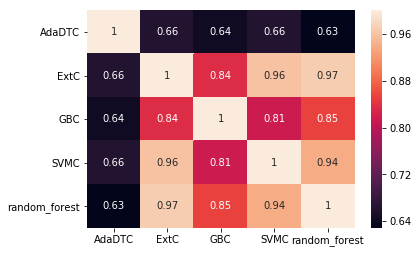

In [159]:
test_Survived_AdaDTC = pd.Series(adaDTC_best.predict(test), name="AdaDTC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVMC")
test_Survived_random_forest = pd.Series(random_forest_best.predict(test), name="random_forest")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_AdaDTC, test_Survived_ExtC, test_Survived_GBC,test_Survived_SVMC,test_Survived_random_forest],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

**Observations:**
* As observed before, Adaboost has the lowest correlation to other predictors. This indicates that it does not predict differently than the others when it comes to the test data.
* We will therefore 'ensemble' the remaining four predictors.

## 4.14 Ensembling
This is the final step, pulling it together with an amazing 'Voting' function from sklearn.
The last line applied the "stacked predictor" to the test data for submission in section 6.

In [160]:
VotingPredictor = VotingClassifier(estimators=[ ('ExtC', ExtC_best), ('GBC',GBC_best), ('SVMC', SVMC_best), ('random_forest', random_forest_best)],
voting='hard', n_jobs=4)
VotingPredictor = VotingPredictor.fit(X_train, Y_train)
VotingPredictor_predictions = VotingPredictor.predict(test)
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")
StackingSubmission4 = pd.concat([PassengerId,test_Survived],axis=1)

In [164]:
StackingSubmission4.to_csv('fork.csv',index=False)

## 4.14. Summary of most important features

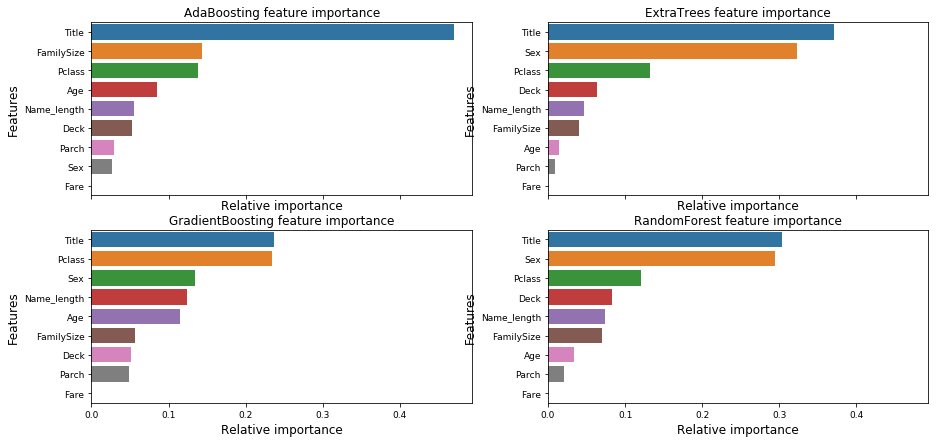

In [163]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,7))
names_classifiers = [("AdaBoosting", adaDTC_best),("ExtraTrees",ExtC_best),
("GradientBoosting",GBC_best), ("RandomForest",random_forest_best)]
nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

# 5. Stacking predictions
## 5.1. Preparing common class and out-of-fold data 

This section describes an alternative method to creating a Stacking ensemble. 
The overall result is not as good and I am not using for my submission, but I kept it there because of its nice use of a Python class to optimize the code.

### 5.1.1. Defining helpers with a Python class

Here we invoke the use of Python's classes to help make it more convenient for us. For any newcomers to programming, one normally hears Classes being used in conjunction with Object-Oriented Programming (OOP). In short, a class helps to extend some code/program for creating objects (variables for old-school peeps) as well as to implement functions and methods specific to that class.

In the section of code below, we essentially write a class *SklearnHelper* that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as  won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [165]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0] # A numpy array is a grid of values, all of the same type, and is indexed by a tuple.
ntest = test.shape[0]
# The number of dimensions is the rank of the array; the shape is a tuple of integers giving the size of the array along each dimension

SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED) 
# KFold provides train/test indices to split data in train and test sets.
# It splits the dataset into k consecutive folds (without shuffling by default).
# Each fold is then used as validation set once while the k - 1 remaining folds form the training set 

# Class to extend the Sklearn classifier (train, predict and fit)
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return(self.clf.fit(x,y).feature_importances_)

Bear with me for those who already know this but for people who have not created classes or objects in Python before, let me explain what the code given above does. In creating my base classifiers, I will only use the models already present in the Sklearn library and therefore only extend the class for that.

**def init** : Python standard for invoking the default constructor for the class. This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed) and params (parameters for the classifiers).

The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers. Essentially, we have created a wrapper class to extend the various Sklearn classifiers so that this should help us reduce having to write the same code over and over when we implement multiple learners to our stacker.

### 5.1.2. Out-of-Fold Predictions

Now as alluded above, stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. We therefore use Kfold again to sample the data and prevent over-fitting.

In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,)) # ntrain represents the size of the 'train' array along each dimension
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

# The enumerate function adds a counter, and starts counting from 0, if no argument
    for i, (train_index, test_index) in enumerate(kf): # kf was created with the KFold function, it creates indices to split the train/test data
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr) # trains classifier on selected train data (indexed with train_index)
        oof_train[test_index] = clf.predict(x_te) # applies classifier on selected test data (indexed with test_index)

 #      oof_test_skf[i, :] = clf.predict(x_test) # applies classifier on all test data (indexed with x_test)

 #   oof_test[:] = oof_test_skf.mean(axis=0) # mean of the first axis (indexed as 0 in tupple arrays)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1) # reshape gives a new shape to an array without changing its data

## 5.2. Applying classifyer (first pass)
So now let us prepare five learning models as our first level classification.
These models can all be conveniently invoked via the Sklearn library and are listed as follows:

 1. Random Forest classifier
 2. Extra Trees classifier
 3. AdaBoost classifer
 4. Gradient Boosting classifer
 5. Support Vector Machine

### 5.2.1. Parameters

Just a quick summary of the parameters that we will be listing here for completeness,

**n_jobs** : Number of cores used for the training process. If set to -1, all cores are used.

**n_estimators** : Number of classification trees in your learning model ( set to 10 per default)

**max_depth** : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high  a number would run the risk of overfitting as one would be growing the tree too deep

**verbose** : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.

 Please check out the full description via the official Sklearn website. There you will find that there are a whole host of other useful parameters that you can play around with. 

In [ ]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

Furthermore, since having mentioned about Objects and classes within the OOP framework, let us now create 5 objects that represent our 5 learning models via our Helper Sklearn Class we defined earlier.

In [ ]:
# Create five objects that represent our five models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

### 5.2.2. Creating NumPy arrays out of our train and test datasets

Having prepared our first layer base models as such, we can now ready the training and test test data for input into our classifiers by generating NumPy arrays out of their original dataframes as follows.
Note: NumPy's main object is an "homogeneous multidimensional array:. It is like a table of elements (usually numbers), all of the same type, indexed by a tuple (a sequence, like a list) of positive integers.
In NumPy dimensions are called axes, 

In [ ]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an Numpy array of the train data
x_test = test.values # Creats an Numpy array of the test data


### 5.2.3. Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [ ]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

from sklearn.metrics import accuracy_score
acc_et  = round(accuracy_score(et_oof_train, y_train) * 100, 2)
acc_rf  = round(accuracy_score(rf_oof_train, y_train) * 100, 2)
acc_ada = round(accuracy_score(ada_oof_train, y_train) * 100, 2)
acc_gb  = round(accuracy_score(gb_oof_train, y_train) * 100, 2)
acc_svc = round(accuracy_score(svc_oof_train, y_train) * 100, 2)
#print(" Extra Tree accuracy: ",  acc_et, '\n',"Random Forest accuracy: ",acc_rf, '\n',"AdaBoost accuracy: ",acc_ada, '\n',"Gradient Boost accuracy: ",acc_gb, '\n',"Support Vector accuracy: ",acc_svc)
accuracy_table = { 'Extra Tree': acc_et, 'Random Forest': acc_rf, 'AdaBoost': acc_ada, 'Gradient Boost': acc_gb,'Support Vector': acc_svc}
accuracy_table

In [ ]:
objects = ('Extra Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'Support Vector')
y_pos = np.arange(len(objects))
accuracies = [acc_et,acc_rf,acc_ada,acc_gb,acc_svc]
 
plt.barh(y_pos, accuracies, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

**Observation:**
* With the random OOF data, Random Forest gets the best result
* All other algorithms 'hover' around 80%

### 5.2.4. Feature importances generated from the different classifiers

Now having learned our the first-level classifiers, we can utilise a very nifty feature of the Sklearn models and that is to output the importances of the various features in the training and test sets with one very simple line of code.

As per the Sklearn documentation, most of the classifiers are built in with an attribute which returns feature importances by simply typing in **.feature_importances_**. Therefore we will invoke this very useful attribute via our function earliand plot the feature importances as such

In [ ]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

Create a dataframe from the lists containing the feature importance data for easy plotting via the Plotly package.

In [ ]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
     'Extra Trees  feature importances': et_feature,
      'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature
    })

### 5.2.5. Interactive feature importances via Plotly scatterplots
I'll use the interactive Plotly package at this juncture to visualise the feature importances values of the different classifiers  via a plotly scatter plot by calling "Scatter" as follows:

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')



Now let us calculate the mean of all the feature importances and store it as a new column in the feature importance dataframe.

In [ ]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

### 5.2.6. Plotly Barplot of Average Feature Importances
Having obtained the mean feature importance across all our classifiers, we can plot them into a Plotly bar plot as follows:

In [ ]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

## 5.3. Second-Level Predictions from the First-level Output

## 5.3.1. Adding first-level output as new features

Having now obtained our first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.
It is as if we are weighting each of the features (or variables in the data set) with additional parameters to highlight their respective roles. And run the prediction algorithm again.

In [ ]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

## 5.3.2. Correlation heatmap of the second level training set

In [ ]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x= base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

Nice graphics, but the obsevation is unclear in my opinion:
* On one side, we hope as analyst that the models come out with similar patterns. An easy direction to follow.
* At the same time, "there have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores". As we say in business, diversity brings better results, this seems to be true with algorithms as well!

In [ ]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)
#len(x_train)
#x_test_table = x_test[:,:]
print("x_test numpy array: {}".format(x_test.shape))

Having now concatenated and joined both the first-level train and test predictions as x_train and x_test, we can now fit a second-level learning model.

# 5.4. Second level learning model via XGBoost

Here we choose the eXtremely famous library for boosted tree learning model, XGBoost. It was built to optimize large-scale boosted tree algorithms. For further information about the algorithm, check out the [official documentation][1].

  [1]: https://xgboost.readthedocs.io/en/latest/

Anyways, we call an XGBClassifier and fit it to the first-level train and target data and use the learned model to predict the test data as follows:

In [ ]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
gbm_predictions = gbm.predict(x_test)

Just a quick run down of the XGBoost parameters used in the model:

**max_depth** : How deep you want to grow your tree. Beware if set to too high a number might run the risk of overfitting.

**gamma** : minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.

**eta** : step size shrinkage used in each boosting step to prevent overfitting

# 6. Producing the submission file for Kaggle

Finally having trained and fit all our first-level and second-level models, we can now output the predictions into the proper format for submission to the Titanic competition.
Which model to choose? These are the results of my many submissions:

1.  The prediction with random_forest (Section 4.9) generates a public score of 0.75119.
2.  The prediction with gsrandom_forest (Section 4.11, after stratification and model cross validation) generates a public score of 0.77990. 
3. The stacked prediction (Section 5) with gbm generates a public score of 0.62679.

Decision: submit #2 as best predictor

In [ ]:
# Generate Submission File 
StackingSubmission5 = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': gbm_predictions })
#print("Predictions: ", len(predictions),'\n', "y-train: ", len(y_train), '\n','PassengerId', len(PassengerId))
StackingSubmission4.to_csv("StackingSubmission.csv", index=False)

print("Completed...")

**Steps for Further Improvement**

As a closing remark it must be noted that the steps taken above just show a very simple way of producing an ensemble stacker. You hear of ensembles created at the highest level of Kaggle competitions which involves monstrous combinations of stacked classifiers as well as levels of stacking which go to more than 2 levels. 

Some additional steps that may be taken to improve one's score could be:

 1. Implementing a good cross-validation strategy in training the models to find optimal parameter values
 2. Introduce a greater variety of base models for learning. The more uncorrelated the results, the better the final score.

# 7. Credits
**Huge credits to Anisotropic,  Yassine Ghouzam, Faron and Sina** for pulling together most of the code in this kernel.